In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC

This project will analyze the Pima Indians Diabetes Database which is used to predict the onset of diabetes based on diagnostic measures. The dataset consists of 768 entries with 9 attributes.
Following are the description of each attributes:
Pregnancies = number of times pregnant
Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure = Diastolic blood pressure (mm Hg)
SkinThickness = Triceps skin fold thickness (mm)
Insulin = 2-Hour serum insulin (mu U/ml)
BMI = Body Mass Index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction
Age
Outcome = Diabetes Negative (0) or Positive (1)

In [77]:
#reading dataset
data = pd.read_csv("/home/students/setijo01/DS420_midterm/diabetes.csv")
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [78]:
data.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [79]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]
X.describe()
y.shape

(768,)

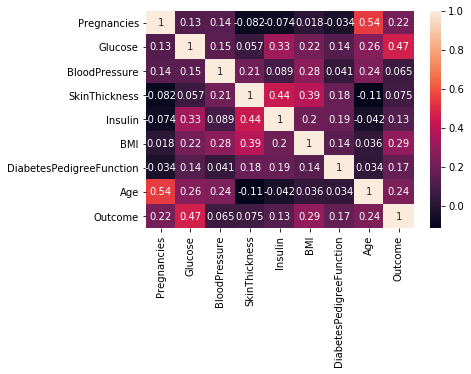

In [112]:
#plotting correlation heatmap between attributes
sns.heatmap(data.corr(), annot=True)

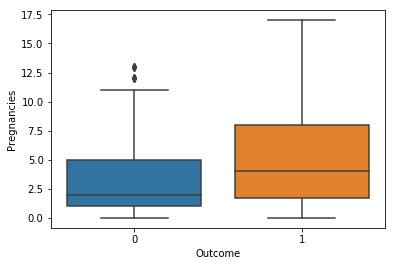

In [81]:
#plotting whisker plot on different attributes
ax = sns.boxplot(x='Outcome', y= 'Pregnancies', data = data)

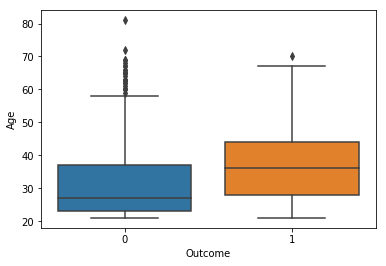

In [82]:
ax = sns.boxplot(x='Outcome', y= 'Age', data = data)

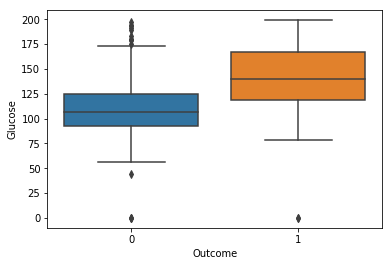

In [83]:
ax = sns.boxplot(x='Outcome', y= 'Glucose', data = data)

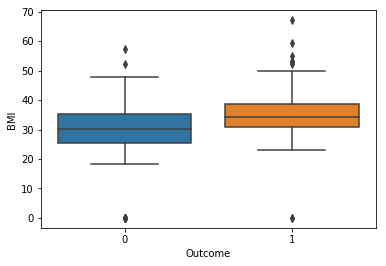

In [84]:
ax = sns.boxplot(x='Outcome', y= 'BMI', data = data)

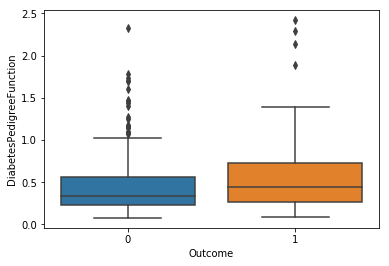

In [85]:
ax = sns.boxplot(x='Outcome', y= 'DiabetesPedigreeFunction', data = data)

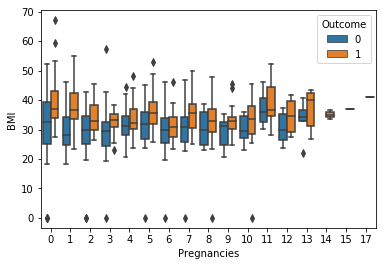

In [86]:
ax = sns.boxplot(x='Pregnancies', y= 'BMI', hue='Outcome', data = data)

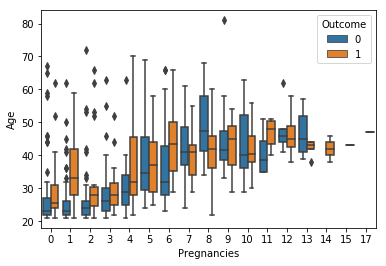

In [87]:
ax = sns.boxplot(x='Pregnancies', y= 'Age', hue='Outcome', data = data)

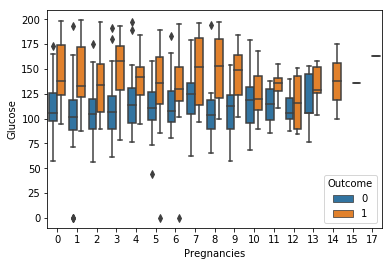

In [88]:
ax = sns.boxplot(x='Pregnancies', y= 'Glucose', hue='Outcome', data = data)

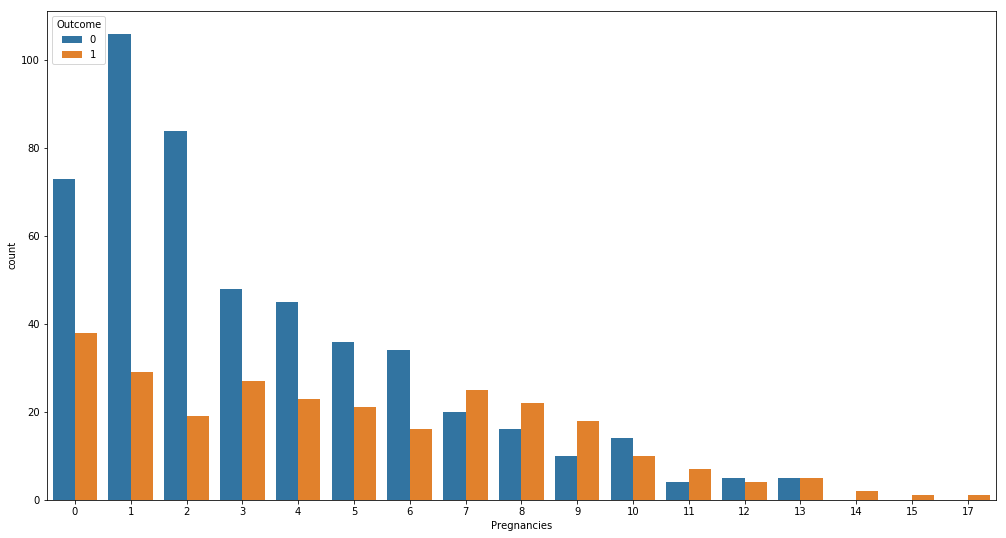

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(17,9)
ax = sns.countplot(x='Pregnancies', hue='Outcome', data = data)

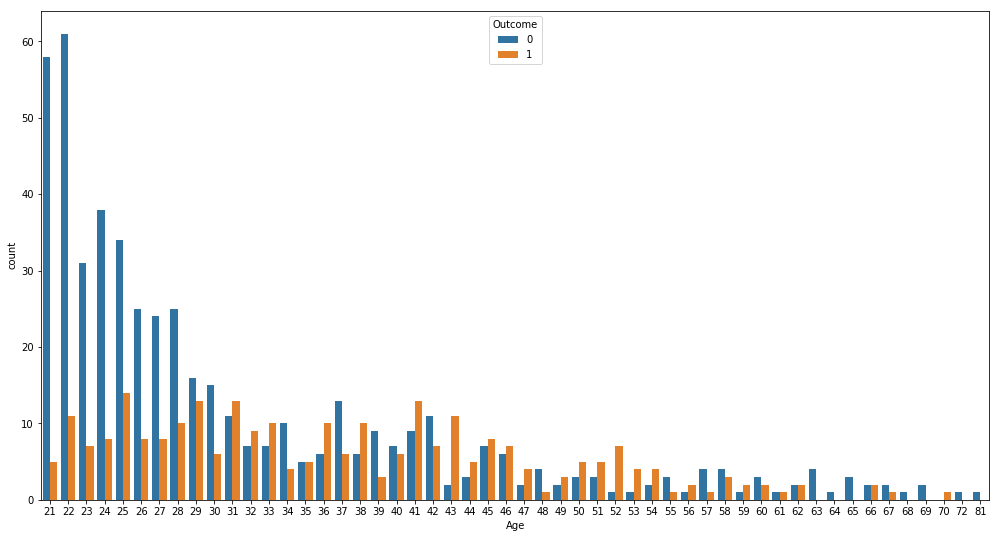

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(17,9)
ax = sns.countplot(x='Age', hue='Outcome', data = data)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17,9)
ax = sns.countplot(x='DiabetesPedigreeFunction', hue='Outcome', data = data)

In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [91]:
#using Support Vector Machine
supp = SVC()
supp.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
svm_pred = supp.predict(X_test)

In [93]:
acc= round(supp.score(X_train,y_train)*100,2)
svm_CM = metrics.confusion_matrix(y_test, svm_pred)

In [94]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

In [95]:
model_naive.fit(X_train,y_train)

GaussianNB(priors=None)

In [96]:
NBpred = model_naive.predict(X_test)

In [97]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)

In [98]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
treePred = model_tree.predict(X_test)

In [100]:
class GDLogisticRegression:
    """
    Implement a very simple very naive GD regression algorithm.  No calculus required -- just patience (maybe)
    """
    def __init__(self, learn_rate=0.1):
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((X.shape[0],1)),X]
        pp = X_new_b.dot(self.theta_best)
        logist = 1/(1+np.exp(-1*pp))
        return logist

    def score(self, X, y):
        return np.sum(np.square(self.predict(X)-y))
    
    def fit(self, X, y, n=1000):
        rows,cols = X.shape
        self.theta_best = np.random.rand(cols+1)
        self.scores = []
        res = self.predict(X)
        lastbase = 0
        for i in range(n):
            base = self.score(X, y)
            self.lr = self.lr / 1.005
            for i in range(len(self.theta_best)):
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                    base = s1
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                    base = s2
                lastbase = base
            self.scores.append(base)

In [101]:
#LogisticRegression
lr = GDLogisticRegression(0.1)

In [102]:
lr.fit(X_train, y_train, 2500)

In [103]:
preds = lr.predict(X_test)
bpreds = [1 if x > 0.5 else 0 for x in preds]

In [104]:
print("SVM acc score:",metrics.accuracy_score(y_test, svm_pred))
print("NB acc score:", metrics.accuracy_score(y_test, NBpred))
print("Decision Tree acc score:", metrics.accuracy_score(y_test, treePred))
print("LR acc score:",metrics.accuracy_score(y_test, bpreds))

SVM acc score: 0.7662337662337663
NB acc score: 0.7597402597402597
Decision Tree acc score: 0.7727272727272727
LR acc score: 0.7922077922077922


In [105]:
print("SVM")
print(svm_CM)
print("Naive-Bayes")
print(metrics.confusion_matrix(y_test,NBpred, labels =[0,1]))
print("Decision Tree")
print(metrics.confusion_matrix(y_test,treePred,labels =[0,1]))
print("LR")
print(metrics.confusion_matrix(y_test,bpreds,labels =[0,1]))

SVM
[[86 16]
 [20 32]]
Naive-Bayes
[[83 19]
 [18 34]]
Decision Tree
[[86 16]
 [19 33]]
LR
[[88 14]
 [18 34]]


In [106]:
print("SVM")
print(metrics.classification_report(y_test,svm_pred,target_names =['Diabetes Negative', 'Diabetes Positive']))
print("Naive-Bayes")
print(metrics.classification_report(y_test,NBpred,target_names =['Diabetes Negative', 'Diabetes Positive']))
print("Decision Tree")
print(metrics.classification_report(y_test,treePred,target_names =['Diabetes Negative', 'Diabetes Positive']))
print("Logistic Regression")
print(metrics.classification_report(y_test,bpreds,target_names =['Diabetes Negative', 'Diabetes Positive']))

SVM
                   precision    recall  f1-score   support

Diabetes Negative       0.81      0.84      0.83       102
Diabetes Positive       0.67      0.62      0.64        52

      avg / total       0.76      0.77      0.76       154

Naive-Bayes
                   precision    recall  f1-score   support

Diabetes Negative       0.82      0.81      0.82       102
Diabetes Positive       0.64      0.65      0.65        52

      avg / total       0.76      0.76      0.76       154

Decision Tree
                   precision    recall  f1-score   support

Diabetes Negative       0.82      0.84      0.83       102
Diabetes Positive       0.67      0.63      0.65        52

      avg / total       0.77      0.77      0.77       154

Logistic Regression
                   precision    recall  f1-score   support

Diabetes Negative       0.83      0.86      0.85       102
Diabetes Positive       0.71      0.65      0.68        52

      avg / total       0.79      0.79      0.79      

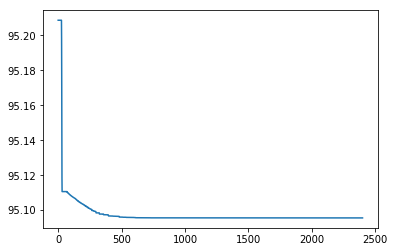

In [107]:
plt.plot(lr.scores[100:])

In [108]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,svm_pred))

0.7292609351432882


In [109]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,treePred))

0.7388763197586727


In [110]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,NBpred))

0.7337858220211161


In [111]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,bpreds))

0.7582956259426847
